# Assignment 1 : Data wrangling using Pandas

##### Problem Statement

In this assignment we are going to analyze a web log file. Read this article for description about a typical web log file: https://en.wikipedia.org/wiki/Common_Log_Format). We need to clean/parse the log file to convert them into a proper tabular format

- In the first part of this assignment, you need to understand the structure of each log and use regular expression to parse the data

- In the second part of the assignment, you will be asked to clean the columns further and perform many useful analysis

Dataset name : 'access_log_Jul95.txt'

##### Questions:

- 1. Write a regular expression to convert the data in a structured output.
- 2. Identify number of requests for each hour and plot the same using line plot. Use the following instructions
    - A. Convert the data type of time column to datetime using pd.to_datetime() with appropriate time format
    - B. Use resample function to identify number of requests per hour and plot the same using line plot
    - C. Interpret the chart and identify from which hour of the day, the number of page visits increases
- 3. Identify different types of `request_type` along with their frequencies
- 4. Analyze `size` column using the following instruction
    - Convert `size` column to numeric (Remove special characters, if necessary)
    - Using pd.cut, divide `size` column in to 10 bins.
    - Identify the bin which has the maximum count
- 5. Using `url` column, create a new column `file_type` based on following conditions
    - If the `url` ends with either `.gif` or `.jpg`, `file_type` will be `image`
    - If the `url` ends with `.html`, `file_type` will be `html`
    - Else `file_type` will be `Other`
    - Identify how many times images were rendered

The Common Log Format, also known as the NCSA Common log format, (after NCSA_HTTPd) is a standardized text file format used by web servers when generating server log files. Because the format is standardized, the files can be readily analyzed by a variety of web analysis programs, for example Webalizer and Analog.

Each line in a file stored in the Common Log Format has the following syntax:

host ident authuser date request status bytes

The format is extended by the Combined Log Format with referrer and user-agent fields.

Therefore the updated log format is as follows:

host ident authuser date request status bytes referrer user-agent

###### Example: 127.0.0.1 user-identifier frank [10/Oct/2000:13:55:36 -0700] "GET /apache_pb.gif HTTP/1.0" 200 2326
A "-" in a field indicates missing data.

- 127.0.0.1 is the IP address of the client (remote host) which made the request to the server.
- user-identifier is the RFC 1413 identity of the client. Usually "-".
- frank is the userid of the person requesting the document. Usually "-" unless .htaccess has requested authentication.
- [10/Oct/2000:13:55:36 -0700] is the date, time, and time zone that the request was received, by default in strftime format %d/%b/%Y:%H:%M:%S %z.
- "GET /apache_pb.gif HTTP/1.0" is the request line from the client. The method GET, /apache_pb.gif the resource requested, and HTTP/1.0 the HTTP protocol.
- 200 is the HTTP status code returned to the client. 2xx is a successful response, 3xx a redirection, 4xx a client error, and 5xx a server error.
- 2326 is the size of the object returned to the client, measured in bytes.

In [498]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [499]:
file = open('access_log_Jul95.txt', 'r')
lines = file.readlines()

##### Answer 1 : Write a regular expression to convert the data in a structured output.

In [500]:
date_regex = "\[([\S\s]+)\]"
request_regex = "\"([\S\s]+)\""

In [501]:
def read_data(line):
    line = line.replace("\n", "")
    date = re.findall(date_regex, line)[0];
    if len(re.findall(request_regex, line))>0:
        request = re.findall(request_regex, line)[0]
    else:
        request = "-"
    splitline = re.sub(request_regex, "-", re.sub(date_regex, "-", line)).split(" ")
    
    return {
        "host": splitline[0],
        "ident": splitline[1],
        "authuser": splitline[2],
        "date": date,
        "request": request,
        "status": splitline[5],
        "bytesn": splitline[6]
    }

In [502]:
host = []
ident = [] 
authuser = []
date = []
request = []
status = []
bytesn = [] 
referrer = []
user_agent = []
for line in lines:
    line_data = read_data(line)
    host.append(line_data["host"])
    ident.append(line_data["ident"])
    authuser.append(line_data["authuser"])
    date.append(line_data["date"])
    request.append(line_data["request"])
    status.append(line_data["status"])
    bytesn.append(line_data["bytesn"])

In [503]:
df_data = {
    "host":host, 
    "ident":ident, 
    "authuser":authuser, 
    "date":date, 
    "request":request, 
    "status":status, 
    "bytesn":bytesn
}

In [504]:
df = pd.DataFrame(df_data)

In [505]:
df.replace("-", np.nan, inplace=True)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   host      91714 non-null  object 
 1   ident     0 non-null      float64
 2   authuser  0 non-null      float64
 3   date      91714 non-null  object 
 4   request   91714 non-null  object 
 5   status    91714 non-null  object 
 6   bytesn    90788 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.9+ MB


#### Answer 2. Identify number of requests for each hour and plot the same using line plot. Use the following instructions
    - A. Convert the data type of time column to datetime using pd.to_datetime() with appropriate time format
    - B. Use resample function to identify number of requests per hour and plot the same using line plot
    - C. Interpret the chart and identify from which hour of the day, the number of page visits increases

###### Converting the data type of time column to datetime using pd.to_datetime() with appropriate time format

In [507]:
df["date"] = pd.to_datetime(df["date"], format='%d/%b/%Y:%H:%M:%S %z')

In [508]:
df["bytesn"] = pd.to_numeric(df["bytesn"])
df["status"] = pd.to_numeric(df["status"])

In [509]:
df.rename(columns={'date': 'time', 'request': 'url', 'status': 'response', 'bytesn': 'size'}, inplace=True)
df.drop(columns=['ident', 'authuser'], inplace=True)

In [510]:
df

,host,time,url,response,size
0,199.72.81.55,1995-07-01 00:00:01-04:00,GET /history/apollo/ HTTP/1.0,200,6245.0
1,unicomp6.unicomp.net,1995-07-01 00:00:06-04:00,GET /shuttle/countdown/ HTTP/1.0,200,3985.0
2,199.120.110.21,1995-07-01 00:00:09-04:00,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085.0
3,burger.letters.com,1995-07-01 00:00:11-04:00,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0.0
4,199.120.110.21,1995-07-01 00:00:11-04:00,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179.0
...,...,...,...,...,...
91709,ix-tam3-07.ix.netcom.com,1995-07-02 13:40:05-04:00,GET /icons/blank.xbm HTTP/1.0,200,509.0
91710,csd1-9.infolink.net,1995-07-02 13:40:06-04:00,GET /procurement/business/kscbus.htm HTTP/1.0,200,1293.0
91711,port49.iprolink.ch,1995-07-02 13:40:07-04:00,GET /shuttle/missions/sts-71/sts-71-day-06-hig...,200,6136.0
91712,che2.llnl.gov,1995-07-02 13:40:07-04:00,GET /shuttle/missions/sts-7/images/ HTTP/1.0,200,1313.0


###### Using resample function to identify number of requests per hour and plot the same using line plot

In [511]:
hourly_df = df.resample("1H", on="time").sum()

###### Interpreting the chart and identify from which hour of the day, the number of page visits increases

<BarContainer object of 38 artists>

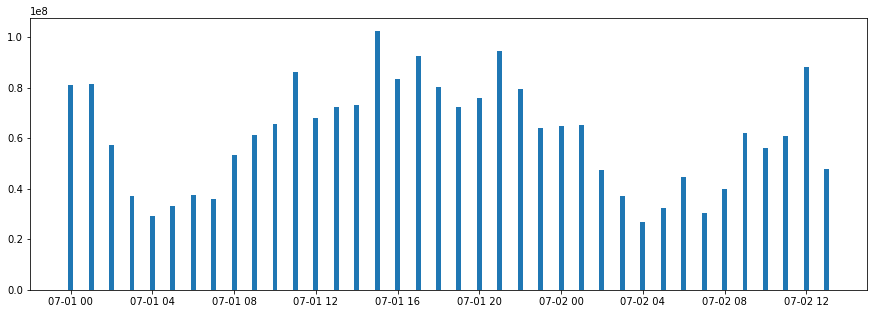

In [512]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=hourly_df.index, height=hourly_df['size'], width=0.01)

##### Answer 3: Identify different types of `request_type` along with their frequencies

In [513]:
df["request_type"] = df["url"].apply(lambda url: re.findall("^[A-Z]+", url)[0])

In [514]:
df["request_type"].value_counts()

GET     91639
HEAD       74
POST        1
Name: request_type, dtype: int64

##### Answer 4: Analyze `size` column using the following instruction
    - Convert `size` column to numeric (Remove special characters, if necessary)
    - Using pd.cut, divide `size` column in to 10 bins.
    - Identify the bin which has the maximum count

In [515]:
bytesn_bin = pd.cut(df['size'], 10)

In [516]:
bytesn_bin.value_counts()

(-1646.592, 164659.2]     88554
(164659.2, 329318.4]       1283
(823296.0, 987955.2]        373
(493977.6, 658636.8]        205
(987955.2, 1152614.4]       173
(329318.4, 493977.6]        147
(1152614.4, 1317273.6]       34
(658636.8, 823296.0]         17
(1481932.8, 1646592.0]        2
(1317273.6, 1481932.8]        0
Name: size, dtype: int64

##### Answer 5: Using `url` column, create a new column `file_type` based on following conditions
    - If the `url` ends with either `.gif` or `.jpg`, `file_type` will be `image`
    - If the `url` ends with `.html`, `file_type` will be `html`
    - Else `file_type` will be `Other`
    - Identify how many times images were rendered

In [517]:
def get_file_original_type(url):
    url_reg_exp = "\/[\/\S]+"
    types_reg_exp = "([a-z0-9]+)"
    ext = "pattern_not_found"
    file_extention = re.findall(url_reg_exp, url, flags=0)
    if len(file_extention)>0:
        file_ext_split = file_extention[0].split(".")
        if len(file_ext_split)>1:
            file_ext = re.findall(types_reg_exp, file_ext_split[len(file_ext_split)-1].lower())            
            if type(file_ext)==list:
                ext = "".join(file_ext)
            else:
                ext = file_ext
    return ext

In [518]:
def get_file_type(file_ext):
    file_img_pattern = "^(gif|jpg|jpeg)$"
    file_html_pattern = "^(html|htm)$"
    file_type = "Other"
    img_pattern = re.findall(file_img_pattern, file_ext)
    html_pattern = re.findall(file_html_pattern, file_ext)
    if len(img_pattern)>0:
        file_type = "Image"
    elif len(html_pattern)>0:
        file_type = "HTML"
    else:
        file_type = "Other" 
    return file_type

In [519]:
file_original_type = df['url'].apply(get_file_original_type)

In [520]:
file_original_type.value_counts()

gif                  47400
html                 20244
pattern_not_found    10498
jpg                   3304
xbm                   2802
                     ...  
plmart                   1
plamsat                  1
plarachnid               1
plroll                   1
plled20and20plant        1
Name: url, Length: 236, dtype: int64

In [521]:
df['file_type'] = file_original_type.apply(get_file_type)

In [522]:
df['file_type'].value_counts()

Image    51060
HTML     20417
Other    20237
Name: file_type, dtype: int64

###### Saving the data into excel files

In [523]:
pd.DataFrame(file_original_type.value_counts()).to_excel("all_file_types.xlsx")
pd.DataFrame(df['file_type'].value_counts()).to_excel("all_files.xlsx")

In [524]:
df.head(10)

,host,time,url,response,size,request_type,file_type
0,199.72.81.55,1995-07-01 00:00:01-04:00,GET /history/apollo/ HTTP/1.0,200,6245.0,GET,Other
1,unicomp6.unicomp.net,1995-07-01 00:00:06-04:00,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,GET,Other
2,199.120.110.21,1995-07-01 00:00:09-04:00,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085.0,GET,HTML
3,burger.letters.com,1995-07-01 00:00:11-04:00,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0.0,GET,HTML
4,199.120.110.21,1995-07-01 00:00:11-04:00,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179.0,GET,Image
5,burger.letters.com,1995-07-01 00:00:12-04:00,GET /images/NASA-logosmall.gif HTTP/1.0,304,0.0,GET,Image
6,burger.letters.com,1995-07-01 00:00:12-04:00,GET /shuttle/countdown/video/livevideo.gif HTT...,200,0.0,GET,Image
7,205.212.115.106,1995-07-01 00:00:12-04:00,GET /shuttle/countdown/countdown.html HTTP/1.0,200,3985.0,GET,HTML
8,d104.aa.net,1995-07-01 00:00:13-04:00,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,GET,Other
9,129.94.144.152,1995-07-01 00:00:13-04:00,GET / HTTP/1.0,200,7074.0,GET,Other
